In [1]:
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import truncexpon

In [2]:
#define known variables
#lower bound = x1, upper bound = x2, mean = M (all in seconds), N = how many ITIs

x1 = 1
x2 = 10
M = 2.5
mu = x1
N = 1200

In [3]:
#find beta
#use scipy.optimize.fsolve 
#the function of beta should become 0 when truncexpon.mean((x2 − x1)/beta, mu, beta) − M) = 2.5
def func(beta):
    return truncexpon.mean((x2 - x1)/beta, mu, beta) - M

beta_res = fsolve(func, 1)
print(beta_res)

[1.52464847]


In [4]:
#solve for b 
b = (x2 - x1)/beta_res

In [5]:
#generate random numbers
r = truncexpon.rvs(b, mu, beta_res, size=N)
r[0:5]

array([1.04906306, 1.17615589, 9.42366477, 1.69356802, 3.54812615])

<AxesSubplot:ylabel='Density'>

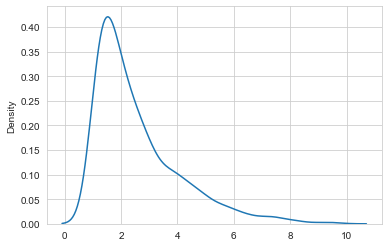

In [6]:
#plot the distribution of the array values
sns.set_style('whitegrid')
sns.kdeplot(np.array(r), bw_adjust=1)

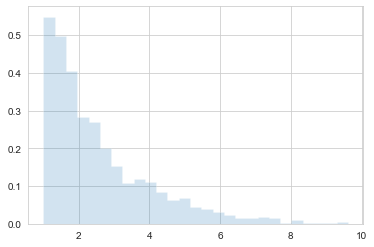

In [7]:
#alternative plot
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()